# French Inequality Project

The rough approach that I will be taking for this project would be as follows 

1. Introduction to the dataset 
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing 
4. Visualisations & Relationship Analysis between variables
5. Modelling to predict income 
6. Summary of key findings
7. Further improvements


# 1. Introduction and objectives of the Data Analysis Project

The dataset given consist of 4 csv files and 2 geojson files. 
    1. The base_etablissment_par_tranche_effectif csv file gives information about the number of firms in every french town categorised by size. This can be an indicator of the level of economic activity within a particular french town.
    2. The name_geographic_information csv file provides geographic data on each french town. Columns that we may want to look at would be latitude and longitude (Would enable us to visualise relationships on a country map)
    3. The net_salary_per_town_per_category csv file provides mean net salary per hour for different demographic groups. This can be potentially useful to investigate whether there is a significant difference between the mean salaries using hypothesis testing 
    4. The population csv file provides the number of people per town, age range, sex and livng mode. This can potentially be useful to garner metrics that give us average rather than absolute amount. 
    
Some objectives that I have for this project would be to 
    1. Look at whether the differences in salary between different demographic groups are statistically significant
    2. Looking at differences in wealth between different states, possibly visualising them on a map since we have coordinate data
    3. Visualisng if there is any relationship between the level of economic activity (determined by the number of firms and population size) and the level of wealth in a particular area/state
    4. Building a linear regression model to elucidate the factors that are the most important in predicting one's salary. This can potentially serve as a way to address any inequality, if present. 

# Importing relevant libraries 

In [22]:
#Main Libraries
import pandas as pd
import numpy as np 
import json
import time
import conda
import os  

#Data Visualisation Libraries 
import seaborn as sns
import geopandas as gpd 
import geoplot
import descartes
from matplotlib import pyplot as plt
plt.style.use('ggplot')

#Changing my working directory
os.chdir('C:\\Users\\sean.lee\\Desktop\\CODE')
#os.chdir('C:\\Users\\65918\\Desktop\\CODE')

# Importing the CSV Files as Pandas DataFrames 

In [23]:
population = pd.read_csv('population.csv')
base = pd.read_csv('base_etablissement_par_tranche_effectif.csv')
geog = pd.read_csv('name_geographic_information.csv')
salary = pd.read_csv('net_salary_per_town_categories.csv')

C:\Users\sean.lee\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Ensuring that the csv files have been imported properly
print(base.head())
print(geog.head())
print(salary.head())
print(population.head())

  CODGEO                   LIBGEO  REG DEP  E14TST  E14TS0ND  E14TS1  E14TS6  \
0  01001  L'Abergement-Clémenciat   82  01      25        22       1       2   
1  01002    L'Abergement-de-Varey   82  01      10         9       1       0   
2  01004        Ambérieu-en-Bugey   82  01     996       577     272      63   
3  01005      Ambérieux-en-Dombes   82  01      99        73      20       3   
4  01006                  Ambléon   82  01       4         4       0       0   

   E14TS10  E14TS20  E14TS50  E14TS100  E14TS200  E14TS500  
0        0        0        0         0         0         0  
1        0        0        0         0         0         0  
2       46       24        9         3         2         0  
3        1        2        0         0         0         0  
4        0        0        0         0         0         0  
  EU_circo  code_région   nom_région chef.lieu_région numéro_département  \
0  Sud-Est           82  Rhône-Alpes             Lyon                 01   
1

In [4]:
with open('communes.geojson', 'r') as f:
    data = json.load(f)
    
from pprint import pprint
pprint(data)

{'features': [{'geometry': {'coordinates': [[[5.378048, 46.203911],
                                             [5.343468, 46.209382],
                                             [5.348598, 46.215391],
                                             [5.354007, 46.225263],
                                             [5.352418, 46.225845],
                                             [5.364336, 46.236062],
                                             [5.368109, 46.23506],
                                             [5.375266, 46.234072],
                                             [5.390942, 46.230395],
                                             [5.385421, 46.222126],
                                             [5.378048, 46.203911]]],
                            'type': 'Polygon'},
               'properties': {'code': '01150', 'nom': 'Drom'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[4.900317, 46.296487],
                                     

               'type': 'Feature'},
              {'geometry': {'coordinates': [[[5.849843, 44.91336],
                                             [5.859664, 44.915519],
                                             [5.866942, 44.914868],
                                             [5.879937, 44.907109],
                                             [5.867665, 44.89577],
                                             [5.862525, 44.898816],
                                             [5.857879, 44.895443],
                                             [5.849372, 44.892905],
                                             [5.839176, 44.896408],
                                             [5.823541, 44.902781],
                                             [5.820619, 44.902648],
                                             [5.823782, 44.908821],
                                             [5.82966, 44.91413],
                                             [5.834166, 44.912016],
                 

               'properties': {'code': '67108', 'nom': 'Duppigheim'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[7.324559, 47.43895],
                                             [7.301736, 47.437814],
                                             [7.289542, 47.43419],
                                             [7.277786, 47.431674],
                                             [7.268821, 47.426648],
                                             [7.246298, 47.422198],
                                             [7.243781, 47.428028],
                                             [7.237579, 47.430635],
                                             [7.235895, 47.436879],
                                             [7.241358, 47.439938],
                                             [7.252237, 47.442675],
                                             [7.272698, 47.444101],
                                             [7.280398, 47.449092],
              

                                             [3.232003, 49.356938],
                                             [3.222121, 49.35499],
                                             [3.21467, 49.350327],
                                             [3.212267, 49.354532],
                                             [3.210804, 49.368836],
                                             [3.218559, 49.382947],
                                             [3.223892, 49.388163],
                                             [3.222787, 49.391998],
                                             [3.208399, 49.396469],
                                             [3.212625, 49.398146]]],
                            'type': 'Polygon'},
               'properties': {'code': '02598', 'nom': 'Pernant'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[3.167273, 49.200989],
                                             [3.163153, 49.193646],
                                   

                                             [2.575288, 44.326282],
                                             [2.578913, 44.321688],
                                             [2.575759, 44.319169],
                                             [2.56773, 44.316218]]],
                            'type': 'Polygon'},
               'properties': {'code': '12174', 'nom': 'Olemps'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[2.642435, 43.986113],
                                             [2.645192, 43.989396],
                                             [2.649942, 43.990461],
                                             [2.658711, 43.988593],
                                             [2.664238, 43.984072],
                                             [2.668477, 43.984833],
                                             [2.665473, 43.992942],
                                             [2.668768, 43.994222],
                                   

              {'geometry': {'coordinates': [[[4.89032, 47.328371],
                                             [4.891971, 47.31722],
                                             [4.89499, 47.309884],
                                             [4.900166, 47.301829],
                                             [4.90372, 47.293199],
                                             [4.903128, 47.289117],
                                             [4.897201, 47.275838],
                                             [4.896374, 47.275137],
                                             [4.892782, 47.276071],
                                             [4.885723, 47.274121],
                                             [4.881875, 47.270597],
                                             [4.875334, 47.267906],
                                             [4.862307, 47.270621],
                                             [4.85546, 47.276846],
                                             [4.84836

                                             [1.379494, 48.702527],
                                             [1.377694, 48.705941],
                                             [1.391473, 48.712116],
                                             [1.389161, 48.719739],
                                             [1.384332, 48.721229],
                                             [1.38907, 48.727861]]],
                            'type': 'Polygon'},
               'properties': {'code': '28223', 'nom': 'Luray'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[1.328947, 48.215095],
                                             [1.349207, 48.214547],
                                             [1.357057, 48.208498],
                                             [1.363238, 48.197984],
                                             [1.354059, 48.192557],
                                             [1.335015, 48.189698],
                                    

              {'geometry': {'coordinates': [[[5.406534, 46.418648],
                                             [5.408327, 46.438858],
                                             [5.409214, 46.443021],
                                             [5.40772, 46.447698],
                                             [5.419809, 46.440081],
                                             [5.427524, 46.438555],
                                             [5.435792, 46.438971],
                                             [5.4409, 46.435677],
                                             [5.447668, 46.434456],
                                             [5.44902, 46.429647],
                                             [5.44658, 46.423411],
                                             [5.44308, 46.412297],
                                             [5.43587, 46.398853],
                                             [5.432427, 46.400117],
                                             [5.430481,

              {'geometry': {'coordinates': [[[4.76296, 49.182147],
                                             [4.759246, 49.188306],
                                             [4.755198, 49.207518],
                                             [4.760901, 49.209716],
                                             [4.771475, 49.210886],
                                             [4.795223, 49.208502],
                                             [4.803393, 49.212649],
                                             [4.813071, 49.209915],
                                             [4.815816, 49.205633],
                                             [4.818815, 49.195845],
                                             [4.811443, 49.191283],
                                             [4.790529, 49.186018],
                                             [4.776214, 49.182992],
                                             [4.76296, 49.182147]]],
                            'type': 'Polygon'},


                                             [0.211953, 48.558563],
                                             [0.203533, 48.55803],
                                             [0.183256, 48.551854],
                                             [0.17633, 48.548583],
                                             [0.17593, 48.538954],
                                             [0.163628, 48.53844],
                                             [0.157647, 48.540578],
                                             [0.161183, 48.548027],
                                             [0.16763, 48.552282],
                                             [0.169177, 48.559064],
                                             [0.169246, 48.569767]]],
                            'type': 'Polygon'},
               'properties': {'code': '61301', 'nom': 'Neauphe-sous-Essai'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[0.201673, 48.497603],
                           

              {'geometry': {'coordinates': [[[6.454352, 47.767594],
                                             [6.458053, 47.763645],
                                             [6.468558, 47.758333],
                                             [6.473868, 47.751502],
                                             [6.469679, 47.747463],
                                             [6.469974, 47.743535],
                                             [6.485537, 47.740235],
                                             [6.487085, 47.736982],
                                             [6.483455, 47.723872],
                                             [6.478253, 47.718789],
                                             [6.442564, 47.73703],
                                             [6.437524, 47.745222],
                                             [6.442494, 47.750766],
                                             [6.440197, 47.75472],
                                             [6.44

                                             [2.65642, 48.253505],
                                             [2.648242, 48.251516],
                                             [2.643269, 48.244508],
                                             [2.63352, 48.246335],
                                             [2.633819, 48.251549],
                                             [2.630229, 48.259561],
                                             [2.630661, 48.272649],
                                             [2.633627, 48.276883],
                                             [2.644661, 48.284386],
                                             [2.666318, 48.289856],
                                             [2.692668, 48.291578]]],
                            'type': 'Polygon'},
               'properties': {'code': '77431',
                              'nom': 'Saint-Pierre-lès-Nemours'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[2.745932, 

              {'geometry': {'coordinates': [[[1.649326, 45.59055],
                                             [1.64818, 45.595172],
                                             [1.63614, 45.602182],
                                             [1.627447, 45.603755],
                                             [1.628701, 45.607669],
                                             [1.636853, 45.604188],
                                             [1.64546, 45.607751],
                                             [1.649263, 45.616232],
                                             [1.658387, 45.617165],
                                             [1.664767, 45.611692],
                                             [1.660198, 45.607976],
                                             [1.659869, 45.598212],
                                             [1.658174, 45.595323],
                                             [1.649326, 45.59055]]],
                            'type': 'Polygon'},
   

                                             [5.686862, 43.813977],
                                             [5.683183, 43.817104],
                                             [5.675776, 43.811601],
                                             [5.674483, 43.807358],
                                             [5.667166, 43.809913],
                                             [5.656437, 43.819374],
                                             [5.654449, 43.825112],
                                             [5.65819, 43.829596],
                                             [5.653529, 43.834282],
                                             [5.65009, 43.842889],
                                             [5.676723, 43.846662],
                                             [5.69312, 43.847802],
                                             [5.702231, 43.84609],
                                             [5.716366, 43.848309],
                                             [5.7251

              {'geometry': {'coordinates': [[[5.214276, 43.381898],
                                             [5.228422, 43.381916],
                                             [5.241956, 43.386845],
                                             [5.249871, 43.392149],
                                             [5.257959, 43.392959],
                                             [5.271308, 43.391168],
                                             [5.275423, 43.388745],
                                             [5.278791, 43.38047],
                                             [5.283977, 43.375083],
                                             [5.278837, 43.367592],
                                             [5.278052, 43.364286],
                                             [5.282249, 43.353652],
                                             [5.270398, 43.344652],
                                             [5.257642, 43.337857],
                                             [5.2

              {'geometry': {'coordinates': [[[-2.086059, 48.325101],
                                             [-2.090662, 48.320605],
                                             [-2.098334, 48.318723],
                                             [-2.107921, 48.327155],
                                             [-2.122187, 48.331834],
                                             [-2.124583, 48.340614],
                                             [-2.133948, 48.351732],
                                             [-2.136724, 48.363198],
                                             [-2.143765, 48.371906],
                                             [-2.149404, 48.380889],
                                             [-2.148046, 48.387748],
                                             [-2.144085, 48.388709],
                                             [-2.139163, 48.38823],
                                             [-2.129967, 48.38403],
                                    

                                             [4.164315, 43.692832],
                                             [4.163622, 43.690138]]],
                            'type': 'Polygon'},
               'properties': {'code': '34145', 'nom': 'Lunel'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[3.901811, 43.779539],
                                             [3.909187, 43.778802],
                                             [3.913349, 43.78237],
                                             [3.920575, 43.783109],
                                             [3.92522, 43.779559],
                                             [3.928427, 43.774822],
                                             [3.925871, 43.766152],
                                             [3.917205, 43.755642],
                                             [3.913604, 43.752886],
                                             [3.901208, 43.751685],
                                     

                            'type': 'Polygon'},
               'properties': {'code': '45343', 'nom': 'Villevoques'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[1.161711, 44.485852],
                                             [1.175626, 44.472131],
                                             [1.173744, 44.469009],
                                             [1.168078, 44.467623],
                                             [1.165117, 44.460454],
                                             [1.16711, 44.454584],
                                             [1.164554, 44.453702],
                                             [1.155985, 44.455227],
                                             [1.149425, 44.450077],
                                             [1.147393, 44.444659],
                                             [1.140169, 44.441927],
                                             [1.140202, 44.45248],
                                 

               'type': 'Feature'},
              {'geometry': {'coordinates': [[[6.009836, 49.266079],
                                             [5.994871, 49.272449],
                                             [5.986851, 49.2745],
                                             [5.980367, 49.27124],
                                             [5.970898, 49.276987],
                                             [5.961777, 49.277159],
                                             [5.952335, 49.28208],
                                             [5.942081, 49.279159],
                                             [5.933541, 49.287572],
                                             [5.933719, 49.289905],
                                             [5.926762, 49.300339],
                                             [5.923087, 49.309325],
                                             [5.924618, 49.313326],
                                             [5.936932, 49.315679],
                 

                                             [2.185644, 50.37019],
                                             [2.185051, 50.371]]],
                            'type': 'Polygon'},
               'properties': {'code': '62468', 'nom': 'Humières'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[2.647553, 50.563924],
                                             [2.647472, 50.573496],
                                             [2.644305, 50.585417],
                                             [2.654985, 50.58975],
                                             [2.66125, 50.586719],
                                             [2.678107, 50.581153],
                                             [2.685096, 50.576858],
                                             [2.697084, 50.563377],
                                             [2.685759, 50.55896],
                                             [2.676264, 50.552383],
                                       

                                             [0.114092, 48.253829],
                                             [0.111545, 48.243077],
                                             [0.107693, 48.235475],
                                             [0.092244, 48.229706],
                                             [0.08681, 48.226987],
                                             [0.067855, 48.225763]]],
                            'type': 'Polygon'},
               'properties': {'code': '72273',
                              'nom': 'Saint-Christophe-du-Jambet'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[0.029965, 47.724588],
                                             [0.028086, 47.724866],
                                             [0.021206, 47.732782],
                                             [0.021482, 47.74021],
                                             [0.019369, 47.747323],
                                             [0.016133

               'properties': {'code': '85292', 'nom': 'Thouarsais-Bouildroux'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[0.126477, 46.914264],
                                             [0.121642, 46.912056],
                                             [0.116589, 46.916773],
                                             [0.11146, 46.913149],
                                             [0.100219, 46.912449],
                                             [0.091538, 46.915903],
                                             [0.085538, 46.919632],
                                             [0.078157, 46.920208],
                                             [0.082945, 46.929009],
                                             [0.080208, 46.937089],
                                             [0.064664, 46.944242],
                                             [0.051471, 46.946994],
                                             [0.062876, 46.955455],
  

                                             [6.866533, 44.187004],
                                             [6.839888, 44.195735],
                                             [6.827955, 44.206018],
                                             [6.822903, 44.215412],
                                             [6.835862, 44.223551],
                                             [6.836429, 44.22768],
                                             [6.843658, 44.25015],
                                             [6.85046, 44.257002],
                                             [6.860231, 44.257743],
                                             [6.863421, 44.259241],
                                             [6.869134, 44.267488],
                                             [6.879302, 44.271326],
                                             [6.901019, 44.278437],
                                             [6.902359, 44.281994],
                                             [6.901

              {'geometry': {'coordinates': [[[2.207312, 44.917996],
                                             [2.204013, 44.92114],
                                             [2.192118, 44.926133],
                                             [2.182204, 44.928316],
                                             [2.165586, 44.934543],
                                             [2.167537, 44.938279],
                                             [2.170771, 44.940757],
                                             [2.177208, 44.948781],
                                             [2.182244, 44.959853],
                                             [2.186345, 44.965345],
                                             [2.1898, 44.966509],
                                             [2.197965, 44.960008],
                                             [2.208199, 44.958852],
                                             [2.219237, 44.96561],
                                             [2.2300

                            'type': 'Polygon'},
               'properties': {'code': '25148', 'nom': 'Chenalotte'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[6.398788, 47.118125],
                                             [6.392675, 47.121043],
                                             [6.374229, 47.120994],
                                             [6.363712, 47.120214],
                                             [6.355895, 47.117154],
                                             [6.352007, 47.119857],
                                             [6.35061, 47.124546],
                                             [6.351203, 47.131145],
                                             [6.368609, 47.143643],
                                             [6.376268, 47.146752],
                                             [6.381508, 47.151432],
                                             [6.39049, 47.151476],
                                  

                                             [1.588585, 43.817177],
                                             [1.578484, 43.812544],
                                             [1.57212, 43.811758],
                                             [1.562401, 43.813541]]],
                            'type': 'Polygon'},
               'properties': {'code': '31346', 'nom': 'Mirepoix-sur-Tarn'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[-0.077015, 43.730799],
                                             [-0.085645, 43.736907],
                                             [-0.08014, 43.736594],
                                             [-0.074633, 43.738603],
                                             [-0.073258, 43.747073],
                                             [-0.087167, 43.749907],
                                             [-0.100177, 43.756634],
                                             [-0.085564, 43.756404],
                 

                                             [-0.26419, 44.195746],
                                             [-0.223447, 44.205895],
                                             [-0.190489, 44.182903],
                                             [-0.147837, 44.153675]]],
                            'type': 'Polygon'},
               'properties': {'code': '40053', 'nom': 'Bourriot-Bergonce'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[-1.05631, 43.585],
                                             [-1.052697, 43.574795],
                                             [-1.04977, 43.574483],
                                             [-1.042381, 43.569838],
                                             [-1.037606, 43.55876],
                                             [-1.036166, 43.555108],
                                             [-1.037347, 43.549763],
                                             [-1.046527, 43.541245],
                  

               'properties': {'code': '51604', 'nom': 'Ventelay'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[3.658882, 48.942122],
                                             [3.646705, 48.951612],
                                             [3.654703, 48.959929],
                                             [3.661539, 48.970968],
                                             [3.670539, 48.980368],
                                             [3.681676, 48.987094],
                                             [3.68605, 48.98727],
                                             [3.695882, 48.982026],
                                             [3.70505, 48.982226],
                                             [3.709769, 48.972771],
                                             [3.706131, 48.972013],
                                             [3.696537, 48.965876],
                                             [3.688779, 48.956833],
                 

              {'geometry': {'coordinates': [[[3.459489, 50.080367],
                                             [3.465619, 50.082465],
                                             [3.471389, 50.081011],
                                             [3.476799, 50.076508],
                                             [3.472705, 50.074391],
                                             [3.46293, 50.072058],
                                             [3.449829, 50.064269],
                                             [3.444023, 50.060866],
                                             [3.440423, 50.06211],
                                             [3.443761, 50.064235],
                                             [3.455471, 50.07851],
                                             [3.459489, 50.080367]]],
                            'type': 'Polygon'},
               'properties': {'code': '59394', 'nom': 'Maurois'},
               'type': 'Feature'},
              {'geometry': {'coordin

                                             [0.005178, 43.394194],
                                             [-0.00189, 43.387064],
                                             [0.000707, 43.385637]]],
                            'type': 'Polygon'},
               'properties': {'code': '64173', 'nom': 'Casteide-Doat'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[-1.08399, 43.415825],
                                             [-1.079666, 43.414434],
                                             [-1.078526, 43.403704],
                                             [-1.065672, 43.39427],
                                             [-1.065375, 43.391356],
                                             [-1.074483, 43.384187],
                                             [-1.07964, 43.381549],
                                             [-1.081292, 43.375741],
                                             [-1.088694, 43.37617],
                      

                                             [5.970445, 45.91375],
                                             [5.963964, 45.911583]]],
                            'type': 'Polygon'},
               'properties': {'code': '74231', 'nom': 'Saint-Eusèbe'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[6.126838, 46.079202],
                                             [6.126808, 46.079698],
                                             [6.134714, 46.089161],
                                             [6.143336, 46.093058],
                                             [6.149311, 46.099838],
                                             [6.155745, 46.104349],
                                             [6.163058, 46.112164],
                                             [6.174909, 46.107202],
                                             [6.192958, 46.101824],
                                             [6.193936, 46.100079],
                             

              {'geometry': {'coordinates': [[[-1.013651, 46.916684],
                                             [-1.007682, 46.917894],
                                             [-0.997548, 46.928274],
                                             [-0.99524, 46.933474],
                                             [-0.983501, 46.934939],
                                             [-0.970135, 46.931905],
                                             [-0.965348, 46.93182],
                                             [-0.952603, 46.934597],
                                             [-0.94141, 46.93453],
                                             [-0.943392, 46.924105],
                                             [-0.94298, 46.916071],
                                             [-0.947226, 46.913519],
                                             [-0.949945, 46.911775],
                                             [-0.955908, 46.902397],
                                       

                                             [5.647018, 44.082943],
                                             [5.640007, 44.075882],
                                             [5.639807, 44.06748],
                                             [5.629945, 44.058044],
                                             [5.621891, 44.049187],
                                             [5.617775, 44.042025],
                                             [5.616779, 44.047082],
                                             [5.614133, 44.049006],
                                             [5.60126, 44.054459],
                                             [5.583849, 44.058066],
                                             [5.573231, 44.059407]]],
                            'type': 'Polygon'},
               'properties': {'code': '04159', 'nom': 'Redortiers'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[5.926489, 44.459512],
                                

                                             [-0.519622, 49.101532]]],
                            'type': 'Polygon'},
               'properties': {'code': '14089', 'nom': 'Bougy'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[-0.368766, 49.226129],
                                             [-0.376139, 49.218887],
                                             [-0.394369, 49.229576],
                                             [-0.398474, 49.233126],
                                             [-0.395351, 49.238499],
                                             [-0.386427, 49.241102],
                                             [-0.370191, 49.233379],
                                             [-0.372588, 49.229599],
                                             [-0.368766, 49.226129]]],
                            'type': 'Polygon'},
               'properties': {'code': '14125', 'nom': 'Cambes-en-Plaine'},
               'type': 'Feature'},
 

               'type': 'Feature'},
              {'geometry': {'coordinates': [[[1.255622, 44.894477],
                                             [1.250681, 44.894752],
                                             [1.248065, 44.88869],
                                             [1.249814, 44.883401],
                                             [1.257218, 44.873433],
                                             [1.254596, 44.864503],
                                             [1.247873, 44.855037],
                                             [1.24494, 44.853074],
                                             [1.230693, 44.850233],
                                             [1.224753, 44.853241],
                                             [1.223151, 44.857542],
                                             [1.223361, 44.866639],
                                             [1.215533, 44.862152],
                                             [1.213904, 44.858223],
               

                                             [4.186584, 44.299733]]],
                            'type': 'Polygon'},
               'properties': {'code': '30097', 'nom': 'Courry'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[3.747524, 44.077912],
                                             [3.741579, 44.077584],
                                             [3.730887, 44.079555],
                                             [3.728296, 44.08377],
                                             [3.721022, 44.087819],
                                             [3.707381, 44.087218],
                                             [3.691126, 44.090793],
                                             [3.680057, 44.098573],
                                             [3.664908, 44.100276],
                                             [3.653917, 44.105672],
                                             [3.651279, 44.113491],
                                   

              {'geometry': {'coordinates': [[[4.193664, 44.970524],
                                             [4.206279, 44.972164],
                                             [4.2164, 44.975331],
                                             [4.218014, 44.974315],
                                             [4.219618, 44.963265],
                                             [4.223851, 44.962878],
                                             [4.221708, 44.96134],
                                             [4.220667, 44.944801],
                                             [4.216577, 44.933571],
                                             [4.202381, 44.923806],
                                             [4.190158, 44.913877],
                                             [4.178268, 44.9165],
                                             [4.178433, 44.931477],
                                             [4.168326, 44.938843],
                                             [4.16661

                            'type': 'Polygon'},
               'properties': {'code': '54435', 'nom': 'Prény'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[5.824224, 49.211092],
                                             [5.848307, 49.212601],
                                             [5.854855, 49.211723],
                                             [5.868183, 49.208977],
                                             [5.867899, 49.203229],
                                             [5.87297, 49.199114],
                                             [5.872817, 49.196096],
                                             [5.865525, 49.196661],
                                             [5.848123, 49.190504],
                                             [5.84213, 49.189434],
                                             [5.839192, 49.18961],
                                             [5.826405, 49.186583],
                                        

              {'geometry': {'coordinates': [[[2.880003, 50.496292],
                                             [2.882077, 50.507749],
                                             [2.889371, 50.507896],
                                             [2.891443, 50.504423],
                                             [2.898952, 50.501554],
                                             [2.904825, 50.503456],
                                             [2.910143, 50.499834],
                                             [2.913696, 50.493899],
                                             [2.911248, 50.489351],
                                             [2.897316, 50.482371],
                                             [2.881063, 50.483834],
                                             [2.880003, 50.496292]]],
                            'type': 'Polygon'},
               'properties': {'code': '62573', 'nom': 'Meurchin'},
               'type': 'Feature'},
              {'geometry': {'coo

                                             [4.501063, 46.821344],
                                             [4.501366, 46.830841],
                                             [4.500075, 46.833812],
                                             [4.490277, 46.829812],
                                             [4.481851, 46.8306],
                                             [4.471599, 46.839972],
                                             [4.472075, 46.845362],
                                             [4.47741, 46.850887],
                                             [4.478692, 46.859835],
                                             [4.471333, 46.86639],
                                             [4.470469, 46.869422],
                                             [4.488431, 46.870661],
                                             [4.509619, 46.866042],
                                             [4.520036, 46.866868]]],
                            'type': 'Polygon'},
  

                                             [2.197738, 49.873604],
                                             [2.205309, 49.873702],
                                             [2.21471, 49.869708],
                                             [2.232988, 49.866799],
                                             [2.244845, 49.863827],
                                             [2.253262, 49.859901],
                                             [2.255781, 49.856976],
                                             [2.252721, 49.850814]]],
                            'type': 'Polygon'},
               'properties': {'code': '80724', 'nom': 'Saleux'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[2.63652, 49.970907],
                                             [2.639807, 49.967591],
                                             [2.64175, 49.961527],
                                             [2.637707, 49.959664],
                                     

                                             [3.542226, 50.049637],
                                             [3.544848, 50.053795],
                                             [3.556439, 50.053904],
                                             [3.567795, 50.052973],
                                             [3.579236, 50.047093],
                                             [3.571745, 50.035489],
                                             [3.55971, 50.039883],
                                             [3.547449, 50.0325]]],
                            'type': 'Polygon'},
               'properties': {'code': '02683', 'nom': 'Saint-Martin-Rivière'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[3.580108, 49.956034],
                                             [3.592952, 49.951493],
                                             [3.59541, 49.948998],
                                             [3.591912, 49.943189],
                        

              {'geometry': {'coordinates': [[[2.778541, 44.94873],
                                             [2.786748, 44.933666],
                                             [2.787291, 44.916924],
                                             [2.780977, 44.911014],
                                             [2.776093, 44.909639],
                                             [2.77354, 44.915091],
                                             [2.760393, 44.92751],
                                             [2.750913, 44.933955],
                                             [2.738258, 44.941219],
                                             [2.744589, 44.949841],
                                             [2.753527, 44.959351],
                                             [2.750846, 44.965118],
                                             [2.75566, 44.965055],
                                             [2.758994, 44.954608],
                                             [2.7607

                                             [5.086195, 44.62843],
                                             [5.096846, 44.623088]]],
                            'type': 'Polygon'},
               'properties': {'code': '26137', 'nom': 'Francillon-sur-Roubion'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[5.135364, 45.298276],
                                             [5.138792, 45.296434],
                                             [5.131355, 45.286531],
                                             [5.129537, 45.279061],
                                             [5.130177, 45.267207],
                                             [5.125663, 45.262091],
                                             [5.121429, 45.248335],
                                             [5.122189, 45.245435],
                                             [5.121745, 45.244231],
                                             [5.108936, 45.238772],
                   

                                             [0.111119, 47.129423],
                                             [0.107488, 47.127148],
                                             [0.104719, 47.120794],
                                             [0.084098, 47.118422],
                                             [0.076371, 47.123931],
                                             [0.07987, 47.130359],
                                             [0.080871, 47.137653],
                                             [0.078395, 47.146335],
                                             [0.094567, 47.150746],
                                             [0.096769, 47.158032],
                                             [0.102437, 47.161338],
                                             [0.104554, 47.160411],
                                             [0.114604, 47.162757],
                                             [0.120633, 47.160034],
                                             [0.1

              {'geometry': {'coordinates': [[[0.717762, 44.123156],
                                             [0.71555, 44.124076],
                                             [0.700444, 44.123635],
                                             [0.691856, 44.111131],
                                             [0.673725, 44.111666],
                                             [0.664108, 44.110026],
                                             [0.663638, 44.097032],
                                             [0.655375, 44.09079],
                                             [0.637734, 44.091973],
                                             [0.62836, 44.085486],
                                             [0.624005, 44.085103],
                                             [0.606276, 44.087089],
                                             [0.601128, 44.105871],
                                             [0.601236, 44.113352],
                                             [0.602

               'properties': {'code': '54055', 'nom': 'Bayonville-sur-Mad'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[5.778925, 49.427327],
                                             [5.780195, 49.425102],
                                             [5.770558, 49.422772],
                                             [5.770691, 49.41418],
                                             [5.780027, 49.40661],
                                             [5.782484, 49.40319],
                                             [5.781615, 49.398665],
                                             [5.766669, 49.399919],
                                             [5.761617, 49.398768],
                                             [5.749324, 49.397464],
                                             [5.748366, 49.40064],
                                             [5.754531, 49.405912],
                                             [5.756385, 49.412034],
        

                            'type': 'Polygon'},
               'properties': {'code': '61269', 'nom': 'Ménil-Hubert-sur-Orne'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[0.108018, 48.89259],
                                             [0.102565, 48.888621],
                                             [0.090755, 48.886638],
                                             [0.093164, 48.899639],
                                             [0.090441, 48.905522],
                                             [0.090569, 48.913256],
                                             [0.08476, 48.917911],
                                             [0.081174, 48.918832],
                                             [0.063734, 48.916774],
                                             [0.065205, 48.924903],
                                             [0.070946, 48.932124],
                                             [0.078046, 48.93519],
                        

                                             [4.738856, 46.845591],
                                             [4.738297, 46.849901],
                                             [4.740164, 46.859403],
                                             [4.755382, 46.868083],
                                             [4.761599, 46.869211],
                                             [4.773439, 46.873856],
                                             [4.786543, 46.869356],
                                             [4.79364, 46.868169],
                                             [4.800778, 46.870716],
                                             [4.808437, 46.876739],
                                             [4.814648, 46.876942],
                                             [4.820038, 46.874618],
                                             [4.825109, 46.864699],
                                             [4.826312, 46.853487],
                                             [4.8

                                             [-0.527158, 46.488309],
                                             [-0.526724, 46.499717],
                                             [-0.523864, 46.502458],
                                             [-0.524798, 46.506576],
                                             [-0.524404, 46.507757],
                                             [-0.508655, 46.519495],
                                             [-0.501634, 46.512423],
                                             [-0.502864, 46.508521],
                                             [-0.496018, 46.504775],
                                             [-0.502624, 46.496464],
                                             [-0.510389, 46.492893],
                                             [-0.511257, 46.4908],
                                             [-0.500396, 46.484995],
                                             [-0.495626, 46.481018],
                                    

               'properties': {'code': '89325', 'nom': 'Ronchères'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[3.273552, 48.012264],
                                             [3.255641, 48.005436],
                                             [3.242311, 47.996052],
                                             [3.241272, 47.993991],
                                             [3.235588, 47.994574],
                                             [3.231633, 47.998472],
                                             [3.234792, 47.999032],
                                             [3.238853, 48.00512],
                                             [3.247674, 48.011703],
                                             [3.252351, 48.018534],
                                             [3.252135, 48.021651],
                                             [3.245744, 48.031908],
                                             [3.236279, 48.03904],
               

              {'geometry': {'coordinates': [[[4.606624, 49.774429],
                                             [4.612587, 49.772557],
                                             [4.618425, 49.774379],
                                             [4.626938, 49.76625],
                                             [4.628488, 49.760642],
                                             [4.613096, 49.758211],
                                             [4.594009, 49.759924],
                                             [4.597863, 49.766777],
                                             [4.606624, 49.774429]]],
                            'type': 'Polygon'},
               'properties': {'code': '08432', 'nom': 'Sury'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[4.929712, 49.64446],
                                             [4.926143, 49.647726],
                                             [4.933401, 49.652653],
                                      

                                             [1.676453, 45.164003]]],
                            'type': 'Polygon'},
               'properties': {'code': '19156', 'nom': 'Palazinges'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[1.336381, 45.280617],
                                             [1.332066, 45.290115],
                                             [1.334501, 45.289372],
                                             [1.345057, 45.294909],
                                             [1.350547, 45.298738],
                                             [1.359489, 45.308523],
                                             [1.362323, 45.31417],
                                             [1.367023, 45.318755],
                                             [1.374004, 45.321425],
                                             [1.376294, 45.317252],
                                             [1.376512, 45.308438],
                               

              {'geometry': {'coordinates': [[[-3.956785, 48.582538],
                                             [-3.943233, 48.590419],
                                             [-3.934897, 48.598283],
                                             [-3.927554, 48.588554],
                                             [-3.926135, 48.58145],
                                             [-3.931304, 48.572226],
                                             [-3.934475, 48.557562],
                                             [-3.945238, 48.54533],
                                             [-3.952498, 48.539876],
                                             [-3.957322, 48.531236],
                                             [-3.957429, 48.527302],
                                             [-3.96262, 48.521195],
                                             [-3.968507, 48.516511],
                                             [-3.978702, 48.49893],
                                      

                            'type': 'Polygon'},
               'properties': {'code': '35113', 'nom': 'Fontenelle'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[-2.094485, 47.952855],
                                             [-2.090729, 47.948854],
                                             [-2.07357, 47.944053],
                                             [-2.066356, 47.947568],
                                             [-2.062927, 47.94423],
                                             [-2.054777, 47.930079],
                                             [-2.057681, 47.928156],
                                             [-2.077328, 47.923285],
                                             [-2.078954, 47.919486],
                                             [-2.09982, 47.937386],
                                             [-2.099959, 47.940623],
                                             [-2.104667, 47.951973],
                       

              {'geometry': {'coordinates': [[[-0.973259, 48.021733],
                                             [-0.971059, 48.011266],
                                             [-0.969585, 47.999516],
                                             [-0.957065, 47.991461],
                                             [-0.947426, 47.987179],
                                             [-0.939384, 47.981824],
                                             [-0.948419, 47.977296],
                                             [-0.970485, 47.977529],
                                             [-0.980862, 47.974977],
                                             [-0.981968, 47.971488],
                                             [-0.979246, 47.968685],
                                             [-0.982666, 47.965528],
                                             [-0.988636, 47.967744],
                                             [-0.998771, 47.96642],
                                   

                                             [1.9156, 49.603724],
                                             [1.92314, 49.597971],
                                             [1.917963, 49.595663],
                                             [1.913398, 49.596321],
                                             [1.906816, 49.590428],
                                             [1.906169, 49.585095],
                                             [1.891485, 49.580317],
                                             [1.887771, 49.584714],
                                             [1.888347, 49.589934],
                                             [1.884039, 49.592792],
                                             [1.868867, 49.594486]]],
                            'type': 'Polygon'},
               'properties': {'code': '60629', 'nom': 'Thérines'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[3.118405, 49.705964],
                                   

               'type': 'Feature'},
              {'geometry': {'coordinates': [[[7.539841, 47.754335],
                                             [7.54808, 47.739589],
                                             [7.547662, 47.729918],
                                             [7.543473, 47.721949],
                                             [7.534948, 47.714714],
                                             [7.52871, 47.717155],
                                             [7.51732, 47.723318],
                                             [7.493238, 47.724592],
                                             [7.466851, 47.722469],
                                             [7.460535, 47.735884],
                                             [7.455723, 47.743463],
                                             [7.485625, 47.743413],
                                             [7.497846, 47.745839],
                                             [7.509333, 47.746456],
                

              {'geometry': {'coordinates': [[[2.637712, 48.845458],
                                             [2.645377, 48.842837],
                                             [2.654069, 48.837003],
                                             [2.658535, 48.832497],
                                             [2.637969, 48.831023],
                                             [2.630434, 48.825154],
                                             [2.627886, 48.819624],
                                             [2.615369, 48.823348],
                                             [2.61635, 48.825952],
                                             [2.622898, 48.828544],
                                             [2.61877, 48.832732],
                                             [2.622319, 48.839552],
                                             [2.637712, 48.845458]]],
                            'type': 'Polygon'},
               'properties': {'code': '77258', 'nom': 'Lognes'},
   

              {'geometry': {'coordinates': [[[5.528481, 46.152989],
                                             [5.525312, 46.146415],
                                             [5.518183, 46.136351],
                                             [5.514207, 46.13813],
                                             [5.499745, 46.141146],
                                             [5.483525, 46.146282],
                                             [5.487228, 46.154327],
                                             [5.487705, 46.160347],
                                             [5.505163, 46.160849],
                                             [5.51921, 46.157303],
                                             [5.524471, 46.153103],
                                             [5.528481, 46.152989]]],
                            'type': 'Polygon'},
               'properties': {'code': '01293', 'nom': 'Peyriat'},
               'type': 'Feature'},
              {'geometry': {'coordi

              {'geometry': {'coordinates': [[[2.811147, 44.21021],
                                             [2.817393, 44.208249],
                                             [2.811621, 44.199715],
                                             [2.816427, 44.197445],
                                             [2.824674, 44.197228],
                                             [2.833788, 44.187477],
                                             [2.823867, 44.181847],
                                             [2.819682, 44.181866],
                                             [2.819208, 44.177678],
                                             [2.823628, 44.168613],
                                             [2.827039, 44.164417],
                                             [2.83463, 44.164518],
                                             [2.842092, 44.163045],
                                             [2.851569, 44.159854],
                                             [2.86

                                             [5.358041, 47.083662],
                                             [5.335364, 47.088012],
                                             [5.34581, 47.098836],
                                             [5.353554, 47.101154],
                                             [5.362845, 47.101091],
                                             [5.384391, 47.097416]]],
                            'type': 'Polygon'},
               'properties': {'code': '21581', 'nom': 'Samerey'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[4.251653, 47.131507],
                                             [4.241172, 47.132491],
                                             [4.243278, 47.140735],
                                             [4.23745, 47.14281],
                                             [4.241896, 47.148226],
                                             [4.242749, 47.149967],
                                    

               'type': 'Feature'},
              {'geometry': {'coordinates': [[[-0.520877, 45.171008],
                                             [-0.51319, 45.167505],
                                             [-0.514997, 45.162823],
                                             [-0.522793, 45.154351],
                                             [-0.52261, 45.138201],
                                             [-0.525434, 45.129663],
                                             [-0.528837, 45.12476],
                                             [-0.538587, 45.122491],
                                             [-0.544461, 45.125409],
                                             [-0.553948, 45.132282],
                                             [-0.560259, 45.135051],
                                             [-0.558725, 45.146366],
                                             [-0.556516, 45.149941],
                                             [-0.55742, 45.153309],
   

                                             [2.936944, 47.659132],
                                             [2.941587, 47.657534],
                                             [2.947234, 47.650848],
                                             [2.954229, 47.645684],
                                             [2.944195, 47.641128],
                                             [2.936155, 47.636425],
                                             [2.933412, 47.63509],
                                             [2.920677, 47.638662],
                                             [2.908899, 47.638631]]],
                            'type': 'Polygon'},
               'properties': {'code': '45070', 'nom': 'Champoulet'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[2.46157, 48.004818],
                                             [2.440387, 48.00985],
                                             [2.424375, 48.012067],
                                 

               'properties': {'code': '57134', 'nom': 'Châtel-Saint-Germain'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[6.170234, 49.023099],
                                             [6.169498, 49.03162],
                                             [6.159768, 49.038608],
                                             [6.150078, 49.036166],
                                             [6.136621, 49.034245],
                                             [6.137757, 49.047263],
                                             [6.149169, 49.051749],
                                             [6.159787, 49.047961],
                                             [6.177222, 49.051039],
                                             [6.176812, 49.042947],
                                             [6.179684, 49.04199],
                                             [6.176791, 49.036596],
                                             [6.179043, 49.030368],
    

                                             [-0.990953, 43.057281],
                                             [-0.967354, 43.05267],
                                             [-0.958673, 43.053324],
                                             [-0.931776, 43.059201],
                                             [-0.930878, 43.05851],
                                             [-0.92593, 43.052123],
                                             [-0.91913, 43.047862],
                                             [-0.909534, 43.040753],
                                             [-0.905138, 43.038854],
                                             [-0.89786, 43.030191],
                                             [-0.89785, 43.025417],
                                             [-0.900873, 43.017719],
                                             [-0.892962, 43.008616],
                                             [-0.891941, 43.003513],
                                        

              {'geometry': {'coordinates': [[[5.841249, 45.782142],
                                             [5.83535, 45.792592],
                                             [5.828722, 45.80176],
                                             [5.823381, 45.805843],
                                             [5.818466, 45.8055],
                                             [5.809477, 45.81708],
                                             [5.81906, 45.822997],
                                             [5.822312, 45.83771],
                                             [5.847029, 45.837392],
                                             [5.865711, 45.842391],
                                             [5.866828, 45.830007],
                                             [5.864076, 45.810921],
                                             [5.867301, 45.797469],
                                             [5.865905, 45.790286],
                                             [5.866501,

                                             [1.299437, 44.130284],
                                             [1.303023, 44.127118],
                                             [1.307793, 44.127297],
                                             [1.313373, 44.123249],
                                             [1.326204, 44.105228],
                                             [1.333024, 44.099163],
                                             [1.345393, 44.094636],
                                             [1.345403, 44.0905],
                                             [1.325836, 44.08983],
                                             [1.314247, 44.086625],
                                             [1.312031, 44.088402],
                                             [1.302338, 44.0925],
                                             [1.300665, 44.099372],
                                             [1.306608, 44.101901],
                                             [1.30941

              {'geometry': {'coordinates': [[[5.477935, 45.867807],
                                             [5.480759, 45.868719],
                                             [5.49049, 45.858632],
                                             [5.500221, 45.853904],
                                             [5.508962, 45.847127],
                                             [5.516618, 45.840293],
                                             [5.50877, 45.834887],
                                             [5.501104, 45.831502],
                                             [5.497957, 45.82047],
                                             [5.489906, 45.81604],
                                             [5.481328, 45.816795],
                                             [5.476869, 45.818765],
                                             [5.468094, 45.816738],
                                             [5.463469, 45.811847],
                                             [5.4584

                                             [4.046271, 48.148161]]],
                            'type': 'Polygon'},
               'properties': {'code': '10204', 'nom': 'Longeville-sur-Mogne'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[4.471058, 48.42367],
                                             [4.462385, 48.429366],
                                             [4.451105, 48.439156],
                                             [4.451467, 48.441398],
                                             [4.460431, 48.445455],
                                             [4.471208, 48.447992],
                                             [4.47889, 48.440832],
                                             [4.484197, 48.431286],
                                             [4.493057, 48.428423],
                                             [4.50046, 48.422344],
                                             [4.496452, 48.418549],
                       

KeyboardInterrupt: 

The geojson file appears to contain coordinates data. As I am not really comfortable with working with coordinate data, I have chosen to work with the coordinates data in the geog csv for now first. 

# 2. Exploratory Data Analysis

In [5]:
##Looking at the dimensions of the 4 dataframes 

print('The dimensions of the base dataframe is ' + str(base.shape))
print('The dimensions of the geog dataframe is ' + str(geog.shape))
print('The dimensions of the population dataframe is ' + str(population.shape))
print('The dimensions of the salary dataframe is ' + str(salary.shape))

The dimensions of the base dataframe is (36681, 14)
The dimensions of the geog dataframe is (36840, 14)
The dimensions of the population dataframe is (8536584, 7)
The dimensions of the salary dataframe is (5136, 26)


In [6]:
##Looking at the datatypes and nullity of the variables

print('The datatypes and nullity of the base dataframe is:') 
print(base.info())
print('\n')

print('The datatypes and nullity of the geog dataframe is:') 
print(geog.info())
print('\n')

print('The datatypes and nullity of the population dataframe is:') 
print(population.info())
print('\n')

print('The datatypes and nullity of the salary dataframe is:') 
print(salary.info())

The datatypes and nullity of the base dataframe is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36681 entries, 0 to 36680
Data columns (total 14 columns):
CODGEO      36681 non-null object
LIBGEO      36681 non-null object
REG         36681 non-null int64
DEP         36681 non-null object
E14TST      36681 non-null int64
E14TS0ND    36681 non-null int64
E14TS1      36681 non-null int64
E14TS6      36681 non-null int64
E14TS10     36681 non-null int64
E14TS20     36681 non-null int64
E14TS50     36681 non-null int64
E14TS100    36681 non-null int64
E14TS200    36681 non-null int64
E14TS500    36681 non-null int64
dtypes: int64(11), object(3)
memory usage: 3.9+ MB
None


The datatypes and nullity of the geog dataframe is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 14 columns):
EU_circo                  36840 non-null object
code_région               36840 non-null int64
nom_région                36840 non-null object
chef.lieu_ré

There are no null fields present in the dataset, which indicates that there is no need to remove/fill in null fields with data. However, there seems to be missing records in the geog dataframe (for the attributes latitutde and longitude). We will need to convert the datatype of some columns (such as CODGEO in the salary dataset to str, etc). 

In [7]:
#Call summary statistics to get a rough sensing of the distribution of the continuous variables that we are dealing with
#I will only be generating summary statistics for the more useful columns 

salary_cont = salary.iloc[:, 2:]
print('The summary statistics for the salary dataframe is:')
print(salary_cont.describe())

base_cont = base.iloc[:,4:]
print('The summary statistics for the base dataframe is:')
print(base_cont.describe())


The summary statistics for the salary dataframe is:
            SNHM14      SNHMC14      SNHMP14      SNHME14      SNHMO14  \
count  5136.000000  5136.000000  5136.000000  5136.000000  5136.000000   
mean     13.706386    23.703836    14.575876    10.564505    11.235650   
std       2.559329     2.836183     1.490110     0.811775     1.221755   
min      10.200000    16.000000    11.600000     8.700000     8.300000   
25%      12.100000    21.900000    13.800000    10.000000    10.600000   
50%      13.000000    23.200000    14.400000    10.400000    11.000000   
75%      14.400000    24.900000    15.100000    10.900000    11.600000   
max      43.300000    51.500000    54.600000    17.500000    46.300000   

           SNHMF14     SNHMFC14     SNHMFP14     SNHMFE14     SNHMFO14  ...  \
count  5136.000000  5136.000000  5136.000000  5136.000000  5136.000000  ...   
mean     12.038026    20.220502    13.274260    10.308879     9.827161  ...   
std       1.787995     2.327550     0.990166

From the above, we can get a rough sensing that the number of firms with a certain number of workers in a city/province decreases as the size of the firm we are talking about increases

We can also see that there is a also a difference at first glance in salary between the different demographic groups. There also likely exists people that are earning way more than average in each subgroup (Max being way higher than the median 50th percentile) 

# Visualising the salary_cont df using boxplots and to identify possible outliers

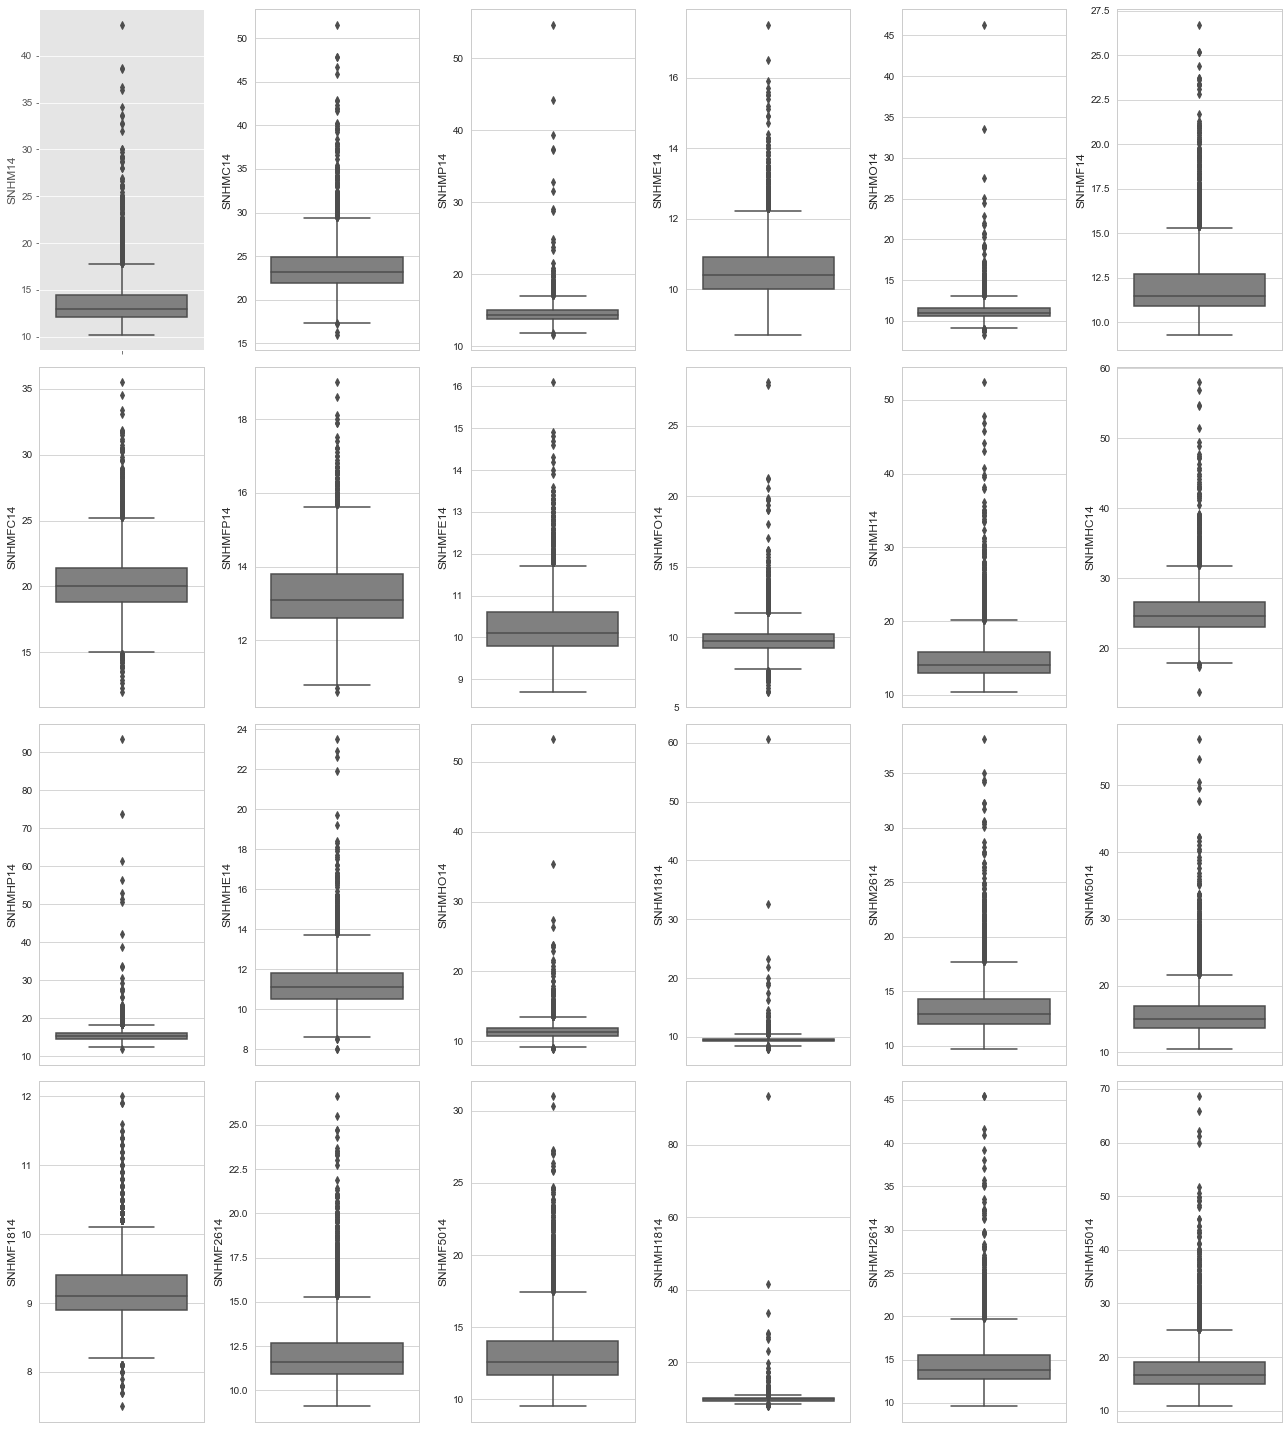

In [8]:
l = salary_cont.columns.values
number_of_columns = 6
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(3*number_of_columns, 5*number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows+1, number_of_columns, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(salary_cont[l[i]], color = 'grey', orient='v')
    plt.tight_layout()

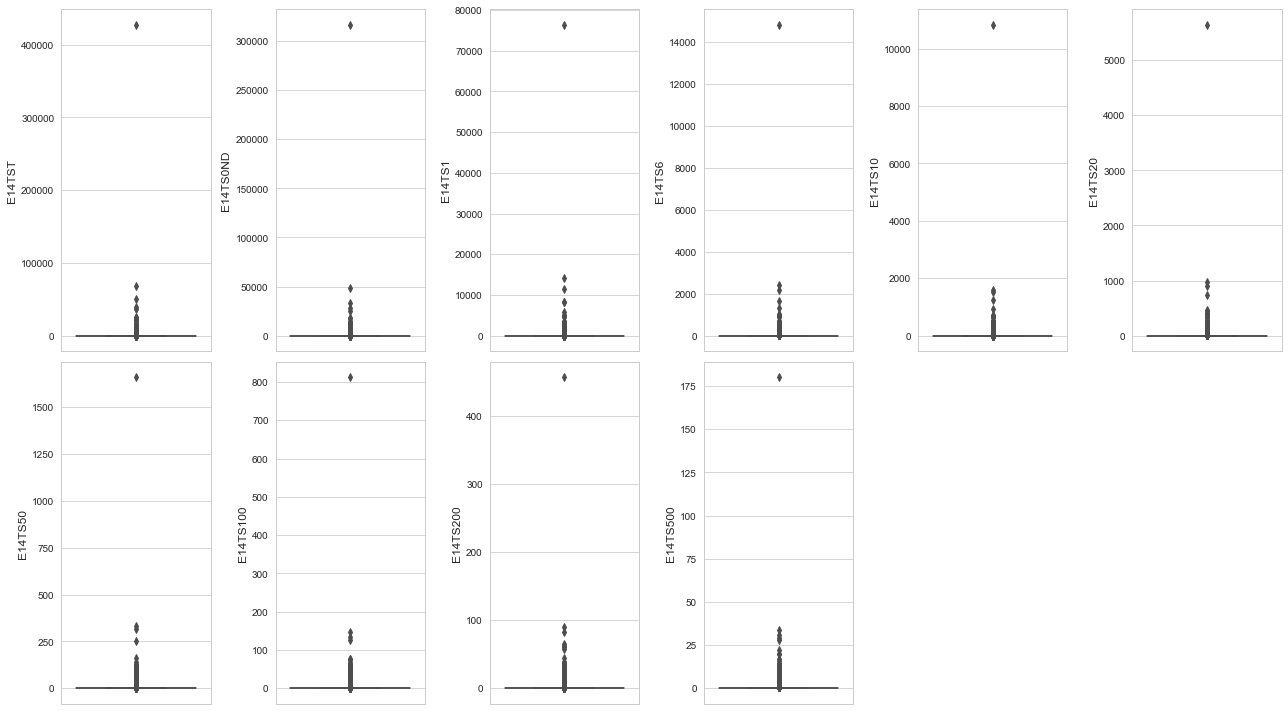

In [9]:
l = base_cont.columns.values
number_of_columns = 6
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(3*number_of_columns, 5*number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows+1, number_of_columns, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(base_cont[l[i]], color = 'grey', orient='v')
    plt.tight_layout()

From the above, we can see that there are the presence of many records that are +- 1 IQR from the 3rd and 1st Quartile respectively. This means that the outliers seen may not be outliers due to extreme inequality within the different subgroups and different levels of economic activity between the municipalities. The data also comes from a relatively reputable source and hence it is likely that the data has been imputed with lesser faults. 

No barplots was generated to look at the distribution of the categorical variables as it would not be useful for this context. This is because the categorical variables provides us with data mostly about the different provinces (latitutde, longitude, etc)

# 3. Data pre-processing

# Merging the relevant dataframes together using the key CODGEO

In [24]:
#Aggregating the population df to get the population in each CODGEO 
df_pop = population[['CODGEO','NB']].groupby('CODGEO').sum().reset_index()

#Conversion of datatype for the variable CODGEO so we can join the dataframes together
salary["CODGEO"] = salary["CODGEO"].astype(str)
base["CODGEO"] = base["CODGEO"].astype(str)
geog["code_insee"] = geog["code_insee"].astype(str)
df_pop["CODGEO"] = df_pop["CODGEO"].astype(str)

#To look at level of economic activity vs salary in different groups on a CODGEO level
salary_base =  pd.merge(base, salary, on = "CODGEO", how = "inner")
df_sbg = pd.merge(salary_base, geog, left_on = "CODGEO", right_on = "code_insee", how = "inner")
df1 = pd.merge(df_sbg, df_pop, left_on = "CODGEO", right_on = "CODGEO", how = "inner")

# Dropping columns that may not be as useful to us

In [25]:
df1.drop(['EU_circo', 'nom_région', 'chef.lieu_région', 'numéro_département',
             'nom_département','préfecture','numéro_circonscription',
             'nom_commune', 'codes_postaux', 'éloignement', 'LIBGEO_y','code_insee','code_région'], 
            axis=1, inplace=True)

These columns were dropped as they were merely descriptions of the integer code column and their removal allows us to work with the smaller dataset more easily. They can still be obtained later on should we require them again from the original dataframes that we have imported

# Changing the datatypes of some columns 

In [26]:
#Changing DEP to the relevant types
df1["DEP"] = df1["DEP"].astype(int)

#Dealing with the incomplete data in the longitude column (4567/4930 records filled)
df1["longitude"] = df1["longitude"].apply(lambda x: str(x).replace(',','.'))
mask = df1["longitude"] == '-'
df1.drop(df1[mask].index, inplace=True)
df1.dropna(subset = ["longitude", "latitude"], inplace=True)
#Switching the column type to float
df1["longitude"] = df1["longitude"].astype(float)

In [27]:
#Convert CODGEO to an int type after checking if the data has been inputed properly 
#- some of the data contains alphanumeric combinations
df1 = df1[df1["CODGEO"].apply(lambda x: str(x).isdigit())]
df1["CODGEO"] = df1["CODGEO"].astype(int)

# Categorising Firm size according to the EU standards

Variable reduction + uses international standards

In [28]:
df1["micro_firms"] = df1["E14TS1"] + df1["E14TS6"]
df1["small_firms"] = df1["E14TS10"] + df1["E14TS20"] 
df1["medium_firms"] = df1["E14TS50"] + df1["E14TS100"]
df1["large_firms"] = df1["E14TS200"] + df1["E14TS500"]

In [29]:
#assigning the values to existing columns, then dropping the unnecessary columns
df1["E14TS1"] = df1["micro_firms"]
df1["E14TS6"] = df1["small_firms"]
df1["E14TS10"] = df1["medium_firms"]
df1["E14TS20"] = df1["large_firms"]

In [30]:
df1.drop(['E14TS50','E14TS100', 'E14TS200', 'E14TS500', 'micro_firms', 'small_firms','medium_firms','large_firms'],
            axis=1, inplace=True)

# Changing the names of some columns for easier reference

In [31]:
df1.rename(columns={'E14TST': 'total_firms',
                          'E14TS0ND': 'unknown_firms',
                          'E14TS1': 'micro_firms',
                          'E14TS6': 'small_firms',
                          'E14TS10': 'medium_firms',
                          'E14TS20': 'large_firms',
                          'NB': 'pop_size',
                          'LIBGEO_x': 'town_name'
                           }, inplace=True)

# Dropping duplicate rows

In [32]:
df1.drop_duplicates(keep=False,inplace=True) 

# 4. Visualisations & Relationship Analysis between Variables

# Visualising the linear relationship between the variables and salaries within each group using a correlation matrix

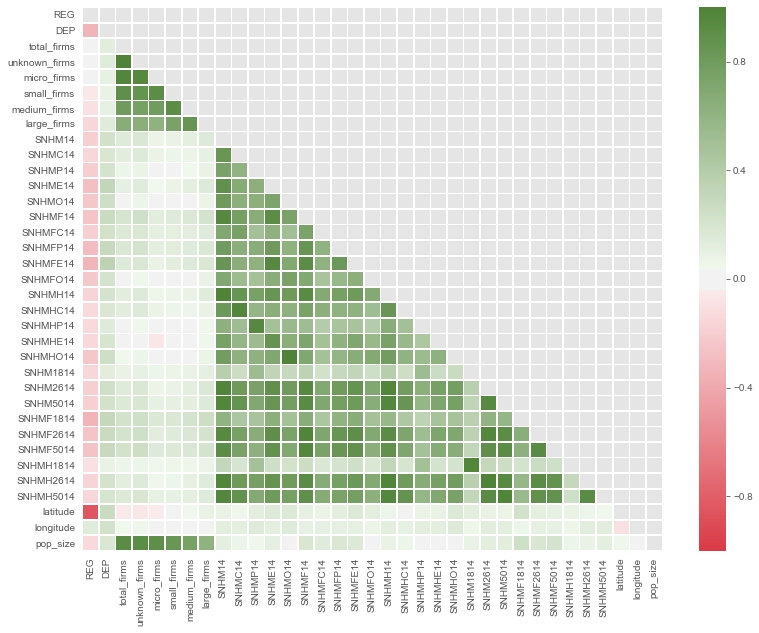

In [33]:
#Remove CODGEO as it will not provide any meaningful information for analysis
df_withoutCODGEO = df1.iloc[:,1:]

#Computing correlation matrix
corr = df_withoutCODGEO.corr()

#Generating a mask for the triangle above the diagonal 
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#Setting up matplotlib figure
f, ax = plt.subplots(figsize=(13,10))

#Generate a custom diverging color palette
cmap = sns.diverging_palette(10,120, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, linewidths=.7)

From the above, we can see that 

1. In states with higher salaries for any demographic group, it also means that the salaries for other demographic groups also tend to me higher (positive correlation between the salaries of different groups)
2. Latitude and longtiude has a weak postive correlation with salary - those towns and cities that are to the north and east of france tend to earn more. 
3. The number of firms in a city also tends to be weakly positively correlated with salaries; and this effect is more apparent for 
4. Population is strongly postiviely correlated with the number of firms in a city and weakly correlated with salaries

In [35]:
df1.to_csv('cleaned.csv')

I continued the rest of the project in R as I am more comfortable with working with coordinates data in R - my apologies for the inconsistency!